### 线性回归的正则化
- The L1 regularization (also called Lasso)
- The L2 regularization (also called Ridge)
- The L1/L2 regularization (also called Elastic net)

In [726]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut

#### 生成原始数据

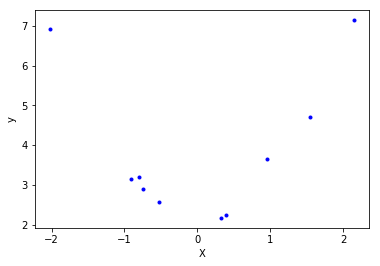

In [718]:
m = 10
X = 6 * np.random.rand(m, 1) - 3 # x的取值范围
X_square = np.square(X)
y = X_square + np.random.rand(m, 1) + 2  #y = x^2 + 2 
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')


In [710]:
data = np.array([[ -2.95507616,  10.94533252],
       [ -0.44226119,   2.96705822],
       [ -2.13294087,   6.57336839],
       [  1.84990823,   5.44244467],
       [  0.35139795,   2.83533936],
       [ -1.77443098,   5.6800407 ],
       [ -1.8657203 ,   6.34470814],
       [  1.61526823,   4.77833358],
       [ -2.38043687,   8.51887713],
       [ -1.40513866,   4.18262786]])

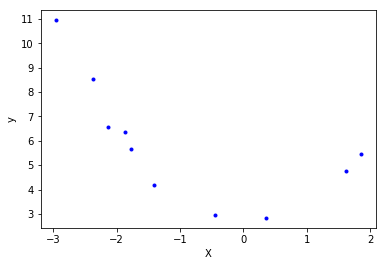

In [739]:
m = data.shape[0]
X = data[:, 0].reshape(-1, 1)  # 将array转换成矩阵
y = data[:, 1].reshape(-1, 1)
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regularization-1.png', dpi=200)

### 1. 多项式回归

#### 添加特征的平方或其他高次方作为训练集中的新特征(现在的模型中只有一个特征)

#### 1.1 拟合直线方程

In [736]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 4.97857827] [[-0.92810463]]


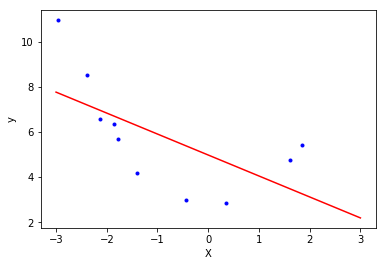

In [737]:
X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_plot = np.dot(X_plot, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
# plt.axis([0, 2, 4, 12])
plt.savefig('regu-2.png', dpi=200)

In [738]:
h = np.dot(X, lin_reg.coef_.T) + lin_reg.intercept_
loss = 1/m * np.sum(np.square(h - y))
print(loss)

3.33630763328


In [734]:
X

array([-2.95507616, -0.44226119, -2.13294087,  1.84990823,  0.35139795,
       -1.77443098, -1.8657203 ,  1.61526823, -2.38043687, -1.40513866])

In [727]:
mean_squared_error(h, y)

3.3363076332788486

#### 拟合线性方程，得到方程的参数

In [775]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly)

[[-2.95507616  8.73247511]
 [-0.44226119  0.19559496]
 [-2.13294087  4.54943675]
 [ 1.84990823  3.42216046]
 [ 0.35139795  0.12348052]
 [-1.77443098  3.1486053 ]
 [-1.8657203   3.48091224]
 [ 1.61526823  2.60909145]
 [-2.38043687  5.66647969]
 [-1.40513866  1.97441465]]


In [776]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 2.60996757] [[-0.12759678  0.9144504 ]]


In [777]:
lin_reg.coef_.T  # 参数的次序与X中特征的次序对应

array([[-0.12759678],
       [ 0.9144504 ]])

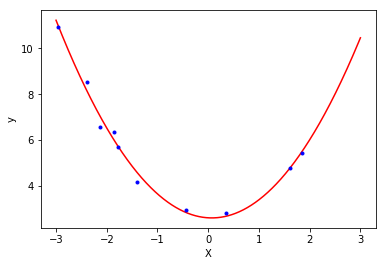

In [781]:
X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
X_plot_poly = poly_features.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regu-3.png', dpi=200)
# plt.show()

In [779]:
h = np.dot(X_poly, lin_reg.coef_.T) + lin_reg.intercept_
loss = mean_squared_error(h, y)
loss

0.071285627890853312

### 2. 过拟合的情况

- 增加自由度，可以增加模型对训练集的拟合度，减小训练误差。但是也会使得模型过于复杂，而降低了泛化能力(没有找到主要特征，过多的考虑了训练集中的特殊样本)

In [793]:
# test different degree and return loss
def try_degree(degree, X, y):
    poly_features_d = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_d = poly_features_d.fit_transform(X)
    lin_reg_d = LinearRegression()
    lin_reg_d.fit(X_poly_d, y)
    return {'X_poly': X_poly_d, 'intercept': lin_reg_d.intercept_, 'coef': lin_reg_d.coef_}

In [796]:
degree2loss_paras = []
for i in range(2, 20):
    paras = try_degree(i, X, y)
    h = np.dot(paras['X_poly'], paras['coef'].T) + paras['intercept']
    _loss = mean_squared_error(h, y)
    degree2loss_paras.append({'d': i, 'loss': _loss, 'coef': paras['coef'], 'intercept': paras['intercept']})
degree2loss_paras

[{'coef': array([[-0.12759678,  0.9144504 ]]),
  'd': 2,
  'intercept': array([ 2.60996757]),
  'loss': 0.071285627890853312},
 {'coef': array([[-0.04617889,  0.87150599, -0.024364  ]]),
  'd': 3,
  'intercept': array([ 2.69998678]),
  'loss': 0.06740483518108531},
 {'coef': array([[ 0.16202617,  0.95155089, -0.09202611, -0.02453635]]),
  'd': 4,
  'intercept': array([ 2.68377591]),
  'loss': 0.063691676188497998},
 {'coef': array([[ 0.17611322,  0.66897657, -0.17015995,  0.05332395,  0.02479577]]),
  'd': 5,
  'intercept': array([ 2.77647113]),
  'loss': 0.056610761171091525},
 {'coef': array([[-0.02889934,  0.61410552,  0.00647098,  0.10165042, -0.00924119,
          -0.01043156]]),
  'd': 6,
  'intercept': array([ 2.78455089]),
  'loss': 0.054742684505909064},
 {'coef': array([[-0.06281954,  0.43769404, -0.0029409 ,  0.20892074,  0.0115497 ,
          -0.02725681, -0.00451347]]),
  'd': 7,
  'intercept': array([ 2.81132697]),
  'loss': 0.054604054190623752},
 {'coef': array([[  0.46

In [797]:
min_index = np.argmin(np.array([i['loss'] for i in degree2loss_paras]))

In [801]:
min_loss_para = degree2loss_paras[min_index]
min_loss_para

{'coef': array([[  0.7900162 ,  26.72083627,   4.33062978,  -7.65908434,
          24.62696711,  12.33754429, -15.72302536,  -9.54076366,
           1.42221981,   1.74521649,   0.27877112]]),
 'd': 11,
 'intercept': array([-0.95562816]),
 'loss': 3.1080267005676934e-23}

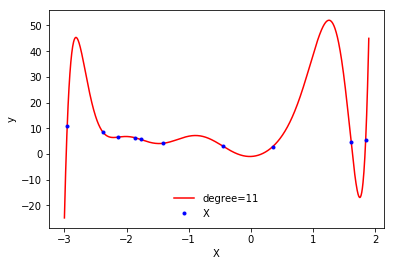

In [810]:
X_plot = np.linspace(-3, 1.9, 1000).reshape(-1, 1)
poly_features_d = PolynomialFeatures(degree=min_loss_para['d'], include_bias=False)
X_plot_poly = poly_features_d.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, min_loss_para['coef'].T) + min_loss_para['intercept']
fig, ax = plt.subplots(1, 1)
ax.plot(X_plot, y_plot, 'r-', label='degree=11')
ax.plot(X, y, 'b.', label='X')
plt.xlabel('X')
plt.ylabel('y')
ax.legend(loc='best', frameon=False)
plt.savefig('regu-4-overfitting.png', dpi=200)

### 3. 正则化
- 正则化项不包括截距项
- 降低了模型的variance(降低方差，可预测性增加了)，但是增加了bias(增加bias，训练集中的误差增加了)
- 最好先对数据进行缩放，然后再分析，[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

#### 3.1 手动添加正则化项L2(Ridge Regression)

In [860]:
# 代价函数
def L_theta(theta, X_x0, y, lamb):
    """
    lamb: lambda, the parameter of regularization
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    X_x0: m·(n+1) matrix, plus x0
    """
    h = np.dot(X_x0, theta)  # np.dot 表示矩阵乘法
    theta_without_t0 = theta[1:]
    L_theta = mean_squared_error(h, y) + lamb * np.sum(np.square(theta_without_t0))
    return L_theta

In [861]:
# 梯度下降
def GD(lamb, X_x0, theta, h, y, alpha):
    """
    lamb: lambda, the parameter of regularization
    alpha: learning rate
    X_x0: m·(n+1), plus x0
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    """
    for i in range(T):
        h = np.dot(X_x0, theta)
        theta_with_t0_0 = np.r_[np.zeros([1, 1]), theta[1:]]  # set theta[0] = 0
        theta -= (alpha * 1/m * np.dot(X_x0.T, h - y) + 2*lamb*(theta_with_t0_0))  # add the gradient of regularization term
        if i%1000==0:
            print(L_theta(theta, X_x0, y, lamb))
    return theta

#### 设置参数
- 迭代次数：T
- 学习率：alpha
- 正则化项参数：lamb

In [862]:
T = 10000  # 迭代次数
degree = 11
theta = np.ones((degree + 1, 1))  # 参数的初始化，degree = 11，一个12个参数
alpha = 0.0000000003  # 学习率
# alpha = 0.003  # 学习率
lamb = 0.0003
poly_features_d = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_d = poly_features_d.fit_transform(X)
X_x0 = np.c_[np.ones((m, 1)), X_poly_d]  # ADD X0 = 1 to each instance
# scaler = StandardScaler()  # 在这里效果不好
# scaler.fit(X_x0)
# X_x0_scaled = scaler.transform(X_x0)

In [863]:
theta = GD(lamb=lamb, X_x0=X_x0, theta=theta, h=h, y=y, alpha=alpha)

66705355.6713
83836.1640246
22095.6154144
5777.82331643
1482.53527703
367.048881129
86.9258089778
22.1098952083
10.2825692031
10.0639154285


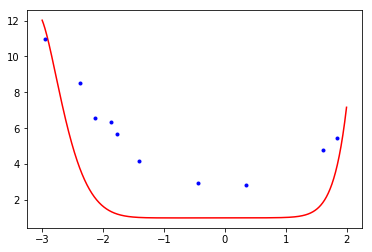

In [864]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
poly_features_d_with_bias = PolynomialFeatures(degree=degree, include_bias=True)
X_plot_poly = poly_features_d_with_bias.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, theta)
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
# plt.axis([0, 2, 4, 12])
plt.show()

添加正则化项后，模型变简单了。此时拟合训练集的效果不是太好，但是鉴于我们的原始数据来源于一个2次方程，因此可预测性提高了很多。

#### 3.2 手动添加正则化项L1(Lasso Regression)

In [876]:
# 代价函数
def L_theta(theta, X_x0, y, lamb):
    """
    lamb: lambda, the parameter of regularization
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    X_x0: m·(n+1) matrix, plus x0
    """
    h = np.dot(X_x0, theta) # np.dot 表示矩阵乘法
    theta_without_t0 = theta[1:]
    L_theta = mean_squared_error(h, y) + lamb * np.sum(np.abs(theta_without_t0))
    return L_theta

In [877]:
# 梯度下降
def GD(lamb, X_x0, theta, h, y, alpha):
    """
    lamb: lambda, the parameter of regularization
    alpha: learning rate
    X_x0: m·(n+1), plus x0
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    """
    for i in range(T):
        h = np.dot(X_x0, theta)
        theta_with_t0_0 = np.r_[np.zeros([1, 1]), theta[1:]]  # set theta[0] = 0
        theta -= (alpha * 1/m * np.dot(X_x0.T, h - y) + 2*lamb*(np.sign(theta_with_t0_0)))  # add the gradient of regularization term
        if i%1000==0:
            print(L_theta(theta, X_x0, y, lamb))
    return theta

In [929]:
T = 10000  # 迭代次数
degree = 11
theta = np.ones((degree + 1, 1))  # 参数的初始化，degree = 11，一个12个参数
alpha = 0.00000000009  # 学习率
# alpha = 0.00006  # 学习率
lamb = 0.00009
poly_features_d = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_d = poly_features_d.fit_transform(X)
# lamb = 0
X_x0 = np.c_[np.ones((m, 1)), X_poly_d]  # ADD X0 = 1 to each instance

In [930]:
theta = GD(lamb=lamb, X_x0=X_x0, theta=theta, h=h, y=y, alpha=alpha)
print(theta)

749348967.791
205317.994438
118395.995939
56407.4911963
17971.8244177
1788.27567206
22.8504300638
55.2227452403
33.1061171937
68.7172587622
[[  9.99926898e-01]
 [ -9.02603623e-05]
 [ -3.94988704e-06]
 [ -1.70848639e-05]
 [ -1.26466490e-04]
 [  1.41393831e-04]
 [ -1.24488885e-04]
 [  1.42423825e-04]
 [ -1.36769090e-04]
 [ -1.58975955e-04]
 [ -1.40245800e-04]
 [ -1.82004406e-04]]


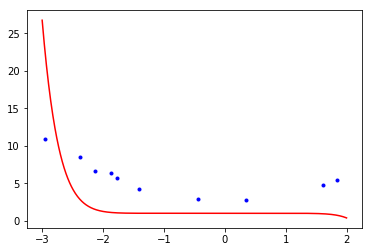

In [932]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
poly_features_d_with_bias = PolynomialFeatures(degree=degree, include_bias=True)
X_plot_poly = poly_features_d_with_bias.fit_transform(X_plot)
h = np.dot(X_plot_poly, theta)
plt.plot(X_plot, h, 'r-')
plt.plot(X, y, 'b.')
# plt.axis([0, 2, 4, 12])
plt.savefig('regu-5.png', dpi=200)

相对于L2，L1得到的模型更简单，例如从[-1, 1]，模型几乎为一条直线

#### 3.3 使用scikit-learn

In [894]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [907]:
lamb = 10
ridge_reg = Ridge(alpha=lamb, solver="cholesky")
ridge_reg.fit(X_poly_d, y)
print(ridge_reg.intercept_, ridge_reg.coef_)

[ 3.03698398] [[ -2.95619849e-02   6.09137803e-02  -4.93919290e-02   1.10593684e-01
   -4.65660197e-02   1.06387336e-01   5.14340826e-02  -2.29460359e-02
   -1.12705709e-02  -1.73925386e-05   2.79198986e-04]]


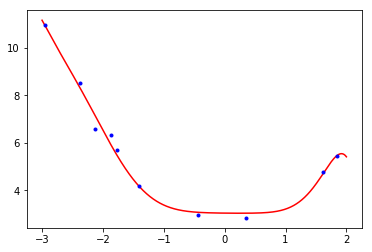

In [933]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
X_plot_poly = poly_features_d.fit_transform(X_plot)
h = np.dot(X_plot_poly, ridge_reg.coef_.T) + ridge_reg.intercept_
plt.plot(X_plot, h, 'r-')
plt.plot(X, y, 'b.')
# plt.axis([0, 2, 4, 12])
# plt.show()
plt.savefig('regu-6.png', dpi=200)

In [922]:
lamb = 0.025
lasso_reg = Lasso(alpha=lamb)
lasso_reg.fit(X_poly_d, y)
print(lasso_reg.intercept_, lasso_reg.coef_)

[ 2.86435179] [ -0.00000000e+00   5.29099723e-01  -3.61182017e-02   9.75614738e-02
   1.61971116e-03  -3.42711766e-03   2.78782527e-04  -1.63421713e-04
  -5.64291215e-06  -1.38933655e-05   1.02036898e-06]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


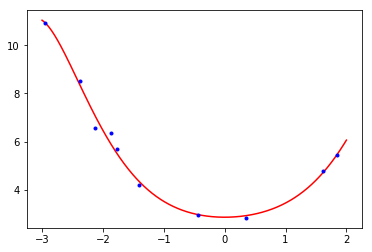

In [934]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
X_plot_poly = poly_features_d.fit_transform(X_plot)
h = np.dot(X_plot_poly, lasso_reg.coef_.T) + lasso_reg.intercept_
plt.plot(X_plot, h, 'r-')
plt.plot(X, y, 'b.')
# plt.axis([0, 2, 4, 12])
# plt.show()
plt.savefig('regu-7.png', dpi=200)

### 4. 使用交叉验证选择正则化的参数
- 使用Leave One Out进行交叉验证

#### 4.1 挑选L2正则化参数

In [902]:
def get_total_loss(X, y, lamb, degree):
    loo = LeaveOneOut()
    loss = []
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    train_poly = poly_features.fit_transform(X)
    for train, test in loo.split(X):  # 利用LOO拆分训练样本和测试样本
#         print("%s %s" % (train, test))
        ridge_reg = Ridge(alpha=lamb, solver="cholesky")
        ridge_reg.fit(train_poly[train], y[train])  # ridge regression training
        loss.append(ridge_reg.predict(train_poly[test]) - y[test])  # save all loss for each test
    return 1/(len(loss)) * np.sum(np.square(np.array(loss)))  # use MSE function to return the total loss

In [903]:
get_total_loss(X, y, 10, 6)

0.20734111419908241

In [904]:
lamb_range = np.geomspace(1e-6, 1e4, 10, endpoint=False)
lamb_range

array([  1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03])

In [905]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

[1.5183585550198837,
 1.5174863694989424,
 1.5088751387170132,
 1.432389199452542,
 1.0566184322679464,
 0.38337321838953636,
 0.38431055801814185,
 0.20734111419908241,
 6.2808412958114737,
 11.94121193348386]

In [906]:
np.argmin(np.array(loss_score))

7

#### 精选

In [690]:
lamb_range = np.linspace(1, 2, 20, endpoint=False)
lamb_range

array([ 1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
        1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
        1.9 ,  1.95])

In [691]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

[2.2905174737627618,
 1.934283047610694,
 1.6304663747425003,
 1.3718151129634721,
 1.1522541593829139,
 0.9666635430804954,
 0.81070395425828501,
 0.68067850765112392,
 0.57342234048114071,
 0.48621378764122547,
 0.41670242492888532,
 0.36285040236193611,
 0.32288432524091998,
 0.29525556373908429,
 0.27860734080268107,
 0.27174730412942932,
 0.27362456030731847,
 0.28331035911669888,
 0.29998177891211963,
 0.32290789129722297]

#### 4.2 挑选L1的参数

In [916]:
def get_total_loss_l1(X, y, lamb, degree):
    loo = LeaveOneOut()
    loss = []
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    train_poly = poly_features.fit_transform(X)
    for train, test in loo.split(X):  # 利用LOO拆分训练样本和测试样本
#         print("%s %s" % (train, test))
        lasso_reg = Lasso(alpha=lamb)
        lasso_reg.fit(train_poly[train], y[train])  # ridge regression training
        loss.append(lasso_reg.predict(train_poly[test]) - y[test])  # save all loss for each test
    return 1/(len(loss)) * np.sum(np.square(np.array(loss)))  # use MSE function to return the total loss

In [917]:
lamb_range = np.geomspace(1e-6, 1e4, 10, endpoint=False)
lamb_range

array([  1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03])

In [918]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss_l1(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[0.67931591680858827,
 0.67828075296154455,
 0.66781265655340516,
 0.59322280603933908,
 0.32091856131286489,
 0.75478492986359247,
 3.9600861112079779,
 10.821291876957668,
 5.2700232844772898,
 6.8359331621592165]

In [919]:
lamb_range = np.geomspace(1e-2, 1, 20, endpoint=False)
lamb_range

array([ 0.01      ,  0.01258925,  0.01584893,  0.01995262,  0.02511886,
        0.03162278,  0.03981072,  0.05011872,  0.06309573,  0.07943282,
        0.1       ,  0.12589254,  0.15848932,  0.19952623,  0.25118864,
        0.31622777,  0.39810717,  0.50118723,  0.63095734,  0.79432823])

In [920]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss_l1(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[0.32091856131286489,
 0.26712344354262701,
 0.2148091515283114,
 0.17164748026659149,
 0.15411982575240529,
 0.19180815393858577,
 0.33453165853241357,
 0.66714524605167158,
 1.0269416556179658,
 0.90840916385077319,
 0.75478492986359247,
 0.56562881062750736,
 0.37517017160528787,
 0.22598188066724614,
 0.17847367378053763,
 0.31471733247887235,
 0.79947447220327261,
 1.6364238206440611,
 2.6640736861565006,
 2.588707556527523]

In [921]:
np.argmin(loss_score)

4

### Reference

- http://enhancedatascience.com/2017/07/04/machine-learning-explained-regularization/
- https://www.youtube.com/watch?v=TmzzQoO8mr4 (cost函数的作用，L1与L2的解，L1的解不稳定)